In [1]:
# Setup
## libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## params
%matplotlib inline
np.random.seed(0)
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

## data
test = pd.read_csv('../test.csv', index_col='Id')
dT = pd.read_csv('../train.csv', index_col='Id')
dT

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
Id,,,,,,,,,,,,,
0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20


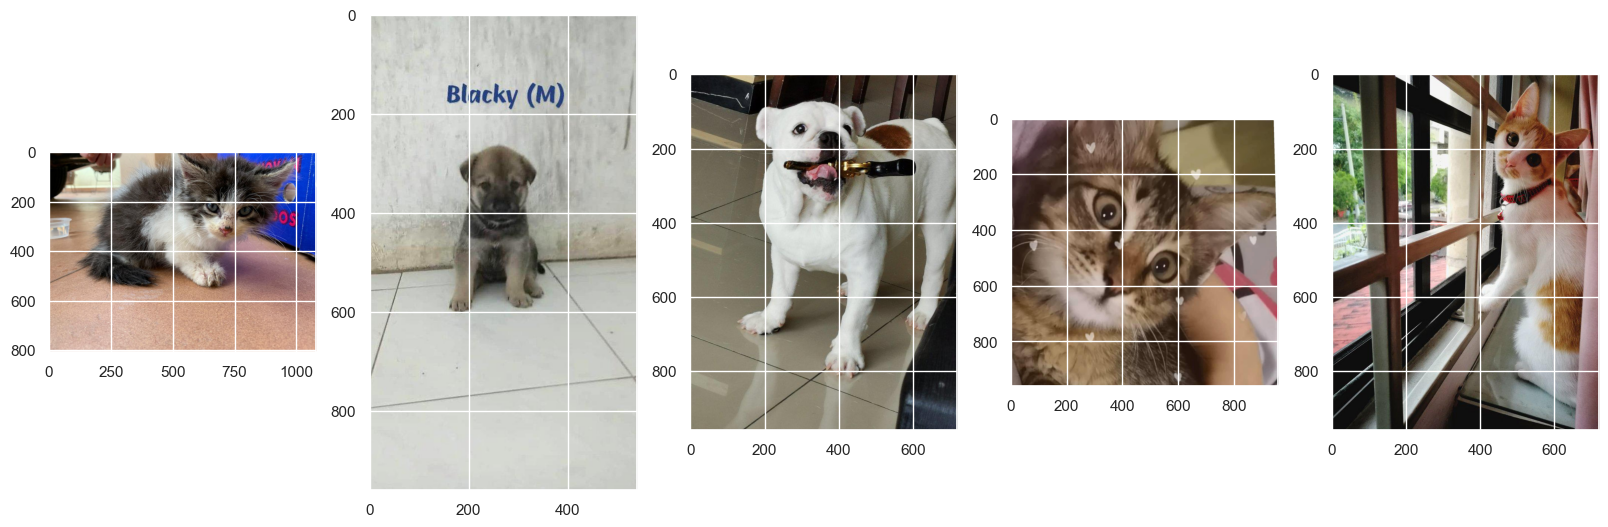

In [2]:
def show_imgs(n,df):
    for i in range(n):
        atual = '1'+str(n)+str(i+1)
        caminho = '../train/'+dT.sample(n=1).index[0]+'.jpg'
        plt.subplot(int(atual))
        plt.imshow(plt.imread(caminho));

show_imgs(5,dT)

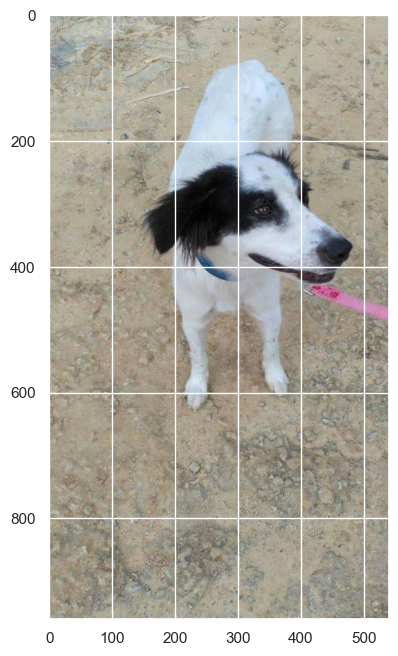

In [26]:
sizes = []
for ii in range(0, len(dT)):
    # caminho = '../train/'+dT.sample(n=1).index[0]+'.jpg'
    caminho = '../train/'+dT.index[ii]+'.jpg'
    uma = plt.imread(caminho)
    sizes.append(uma.shape)
    # print(uma.shape)
plt.imshow(uma);

,x,y
count,9912.000000,9912.000000
mean,904.284302,804.426251
std,156.905980,270.211921
min,113.000000,90.000000
25%,908.750000,675.000000
50%,960.000000,720.000000
75%,960.000000,960.000000
max,1280.000000,1280.000000


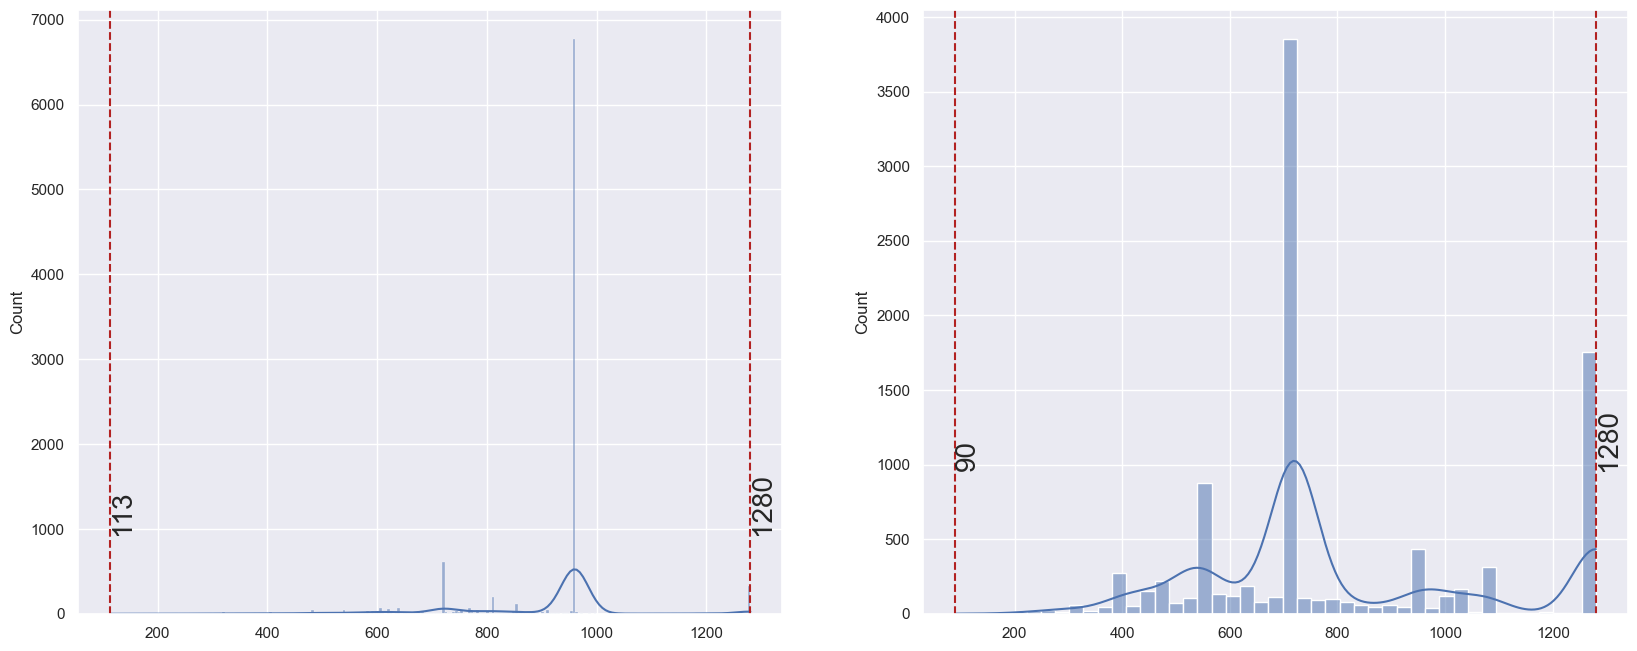

In [123]:
x = [i[0] for i in sizes]
y = [j[1] for j in sizes]

sizesDF = pd.DataFrame({'x': x, 'y':y})

# sns.scatterplot(x = x, y = y);
ax = plt.subplot(121);
sns.histplot(data = x, ax = ax, kde = True);
plt.axvline(x = min(x), color = 'firebrick', linestyle = '--');
plt.axvline(x = max(x), color = 'firebrick', linestyle = '--');
plt.text(x = min(x),y = 1000,s=str(min(x)),rotation=90, fontsize = 20);
plt.text(x = max(x),y = 1000,s=str(max(x)),rotation=90, fontsize = 20);
# plt.axhline(y = min(x), color = 'firebrick', linestyle = '--');
# plt.axhline(y = max(x), color = 'firebrick', linestyle = '--');

ax2= plt.subplot(122);
# sns.violinplot(data = y, ax = ax2)
sns.histplot(data = y, ax = ax2, kde = True);
plt.axvline(x = min(y), color = 'firebrick', linestyle = '--');
plt.axvline(x = max(y), color = 'firebrick', linestyle = '--');
plt.text(x = min(y),y = 1000,s=str(min(y)),rotation=90, fontsize = 20);
plt.text(x = max(y),y = 1000,s=str(max(y)),rotation=90, fontsize = 20);

sizesDF.describe()

In [ ]:
# Cross validated measure of feature importance for each category:
X = dT.copy()
y = X.pop('Pawpularity')
X_test = test.copy()

from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm

final_predictions = []
history =[]

kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X, y)

for fold, (train_indicies, valid_indicies) in enumerate(tqdm(kf.split(X=X,y=y))):
    X_train = X.iloc[train_indicies]
    X_valid = X.iloc[valid_indicies]

    y_train = y[train_indicies]
    y_valid = y[valid_indicies]

    print('Fold:', fold+1)

    model = makeModel()

    h = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=250,
        # batch_size = 200,
        verbose=1,
    )
    history.append(h)

    # model.fit(
    #     X = X_train,y= y_train,eval_metric ='rmse'
    # )

    # preds_valid = model.predict_proba(X_valid)
    # preds_valid = model.predict(X_valid)
    # history.append([fold, mean_absolute_error(y_valid,preds_valid)])

    # preds_test = model.predict(X_test)
    # final_predictions.append(preds_test)

    # print(history[-1])


# FI = pd.DataFrame({'feats':X.columns,'imp':model.feature_importances_}).sort_values(by='imp',ascending=False)
# FI

In [ ]:
hh = history[0]
plt.subplot(211);
ax = sns.lineplot(x = hh.epoch,y=hh.history['loss']);
ax = sns.lineplot(x = hh.epoch,y=hh.history['val_loss'], linestyle='--', ax = ax);
# ax.set(yscale="log");
plt.title('Convergência do modelo em treinamento',fontsize=24);
plt.ylabel('MAE [%]',fontsize=18);
plt.legend(['Treino','Validação'],fontsize=18)
# plt.xlim([250,300])
# plt.ylim([0,20])

plt.subplot(212); #val_mean_absolute_error
ax2 = sns.lineplot(x = hh.epoch,y=hh.history['mean_absolute_percentage_error']);
ax2 = sns.lineplot(x = hh.epoch,y=hh.history['val_mean_absolute_percentage_error'], linestyle='--', ax = ax2);
# ax2.set(yscale="log");
plt.ylabel('MAE',fontsize=18);
plt.xlabel('Épocas',fontsize=18);

In [ ]:
print(history)

maior =0.0
for ii in range(len(history)):
    if history[ii][1]>maior:
        maior = history[ii][1]
        max_index = ii

print(history[max_index][1])
sub = final_predictions[:][max_index]
sns.histplot(data = sub,alpha = 0.6)
mysub = pd.DataFrame(test.index)
mysub['Pawpularity'] = sub

mysub['Pawpularity'].hist(alpha = 0.6)

var = 'xgboost_simpleEDA_firstSub'
mysub.to_csv(var+'_submisssion.csv',index=False)